In [1]:
import tensorflow as tf
hello = tf.constant('Hello,Tensorflow!')
with tf.Session() as sess:
    print(sess.run(hello))

b'Hello,Tensorflow!'


In [2]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [3]:
3+2

5

In [4]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [5]:
1+1

2

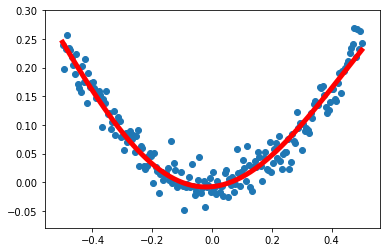

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#制造数据，加上随机噪声
x_data = np.linspace(-0.5, 0.5, 200)[:,np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data=np.square(x_data)+noise

#定义两层简单的网络
x=tf.placeholder(tf.float32,[None,1])
y=tf.placeholder(tf.float32,[None,1])
 
w1=tf.Variable(tf.random_normal([1,10]))
b1=tf.Variable(tf.zeros([1,10]))
 
wx_plus_b1=tf.matmul(x,w1)+b1
l1=tf.nn.tanh(wx_plus_b1)
 
w2=tf.Variable(tf.random_normal([10,1]))
b2=tf.Variable(tf.zeros([1,1]))
 
wx_plus_b2=tf.matmul(l1,w2)+b2
predict=tf.nn.tanh(wx_plus_b2)
 
#损失函数选用SME
loss=tf.reduce_mean(tf.square(y-predict))
#优化函数选取梯度下降法
train=tf.train.GradientDescentOptimizer(0.1).minimize(loss)
 
with tf.Session() as sess:
    predict_y = None
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        sess.run(train,feed_dict={x:x_data,y:y_data})
 
    #训练完成后，通过模型得到预测的y值
    predict_y=sess.run(predict,feed_dict={x:x_data})
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,predict_y,'r',lw=5)
    plt.show()

Epoch: 0050 cost= 0.109384544 W= [0.35377246] b= [0.07469226]
Epoch: 0100 cost= 0.105672576 W= [0.3477544] b= [0.11735757]
Epoch: 0150 cost= 0.102385134 W= [0.34209093] b= [0.15750894]
Epoch: 0200 cost= 0.099473707 W= [0.33676118] b= [0.19529454]
Epoch: 0250 cost= 0.096895233 W= [0.33174542] b= [0.2308539]
Epoch: 0300 cost= 0.094611660 W= [0.32702523] b= [0.26431796]
Epoch: 0350 cost= 0.092589274 W= [0.32258317] b= [0.2958102]
Epoch: 0400 cost= 0.090798184 W= [0.3184028] b= [0.325447]
Epoch: 0450 cost= 0.089211933 W= [0.3144688] b= [0.35333753]
Epoch: 0500 cost= 0.087807126 W= [0.31076655] b= [0.3795847]
Epoch: 0550 cost= 0.086562946 W= [0.30728245] b= [0.40428546]
Epoch: 0600 cost= 0.085461102 W= [0.30400363] b= [0.4275308]
Epoch: 0650 cost= 0.084485240 W= [0.30091798] b= [0.44940665]
Epoch: 0700 cost= 0.083621010 W= [0.29801416] b= [0.4699934]
Epoch: 0750 cost= 0.082855642 W= [0.29528144] b= [0.48936713]
Epoch: 0800 cost= 0.082177781 W= [0.29270974] b= [0.50759935]
Epoch: 0850 cost= 

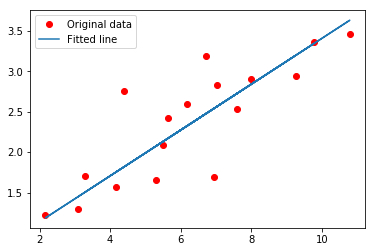

Testing... (Mean square loss Comparison)
Testing cost= 0.07532631
Absolute mean square loss difference: 0.0048316047


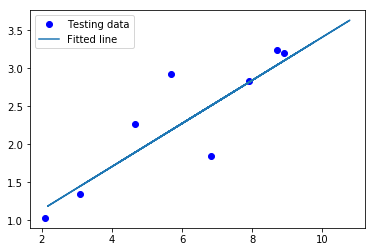

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Set model weights
W = tf.Variable(tf.random_uniform([1]))
b = tf.Variable(tf.zeros([1]))

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X:train_X, Y: train_Y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()